In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.gridspec import GridSpec

%matplotlib inline

# PyTorch
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torch import optim
import copy
import math
import time

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
PATH ='input/'
train = pd.read_csv(PATH+'train.csv')
test = pd.read_csv(PATH+'test.csv')
combine = pd.concat([train.assign(DS='train') ,test.assign(DS='test',Survived='NA')],axis=0)

In [42]:
print(combine.isna().sum(axis=0))

Age             263
Cabin          1014
DS                0
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64


In [43]:
surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]
surv_col = "blue"
nosurv_col = "red"

print("Survived: %i (%.1f percent), Not Survived: %i (%.1f percent), Total: %i"\
      %(len(surv), 1.*len(surv)/len(train)*100.0,\
        len(nosurv), 1.*len(nosurv)/len(train)*100.0, len(train)))

Survived: 342 (38.4 percent), Not Survived: 549 (61.6 percent), Total: 891


Check the age groups distribution

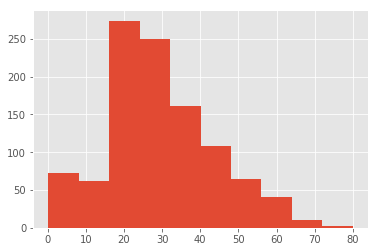

In [44]:
agebins = plt.hist(combine['Age'][combine['Age'].isnull()==False],bins=10)
combine['AgeAbove12'] = np.NAN
combine['AgeAbove12'] =[ 2 if x>12 else 1 for x in combine['Age']]

In [45]:
combine['NoPerTicket']  = combine['Ticket'].value_counts()[combine['Ticket']].values
# or 
combine['Ticket_group'] = combine.groupby('Ticket')['Name'].transform('count')
combine.drop(labels=['Ticket_group'],inplace=True,axis=1)


In [46]:
t = combine[(combine['Parch']==0) & (combine['Age'].isnull()==True) & (combine['SibSp']==0) & (combine['NoPerTicket']==1)]['PassengerId']
for i in combine['PassengerId']:
    if i in t:
        combine.loc[i,'AgeAbove12'] =2

#single ticket but siblings or parch are there
combine[(combine['NoPerTicket']==1) & (combine['Age'].isnull()==False) & ((combine['Parch']>0) | (combine['SibSp']>0)) ]

,Age,Cabin,DS,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeAbove12,NoPerTicket
0,22.0,NaN,train,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,2,1
40,40.0,NaN,train,S,9.4750,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,41,3,female,1,0,7546,2,1
68,17.0,NaN,train,S,7.9250,"Andersson, Miss. Erna Alexandra",2,69,3,female,4,1,3101281,2,1
69,26.0,NaN,train,S,8.6625,"Kink, Mr. Vincenz",0,70,3,male,2,0,315151,2,1
104,37.0,NaN,train,S,7.9250,"Gustafsson, Mr. Anders Vilhelm",0,105,3,male,2,0,3101276,2,1
113,20.0,NaN,train,S,9.8250,"Jussila, Miss. Katriina",0,114,3,female,1,0,4136,2,1
136,19.0,D47,train,S,26.2833,"Newsom, Miss. Helen Monypeny",2,137,1,female,0,1,11752,2,1
175,18.0,NaN,train,S,7.8542,"Klasen, Mr. Klas Albin",1,176,3,male,1,0,350404,2,1
192,19.0,NaN,train,S,7.8542,"Andersen-Jensen, Miss. Carla Christine Nielsine",0,193,3,female,1,1,350046,2,1
197,42.0,NaN,train,S,8.4042,"Olsen, Mr. Karl Siegwart Andreas",1,198,3,male,0,0,4579,2,1


In [47]:
combine['Title'] = combine.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
combine['Title'] = combine['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
combine['Title'] = combine['Title'].replace('Mlle', 'Miss')
combine['Title'] = combine['Title'].replace('Ms', 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')
print(combine['Title'].value_counts(dropna=False))
print(pd.crosstab(combine['Title'],combine['Sex']))

Mr          757
Miss        264
Mrs         198
Master       61
Rev           8
Dr            8
Col           4
Royal         3
Major         2
Dona          1
Don           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64
Sex       female  male
Title                 
Capt           0     1
Col            0     4
Don            0     1
Dona           1     0
Dr             1     7
Jonkheer       0     1
Major          0     2
Master         0    61
Miss         264     0
Mr             0   757
Mrs          198     0
Rev            0     8
Royal          2     1


In [48]:
#To check whether any male with title as Mr is having less than 10 yrs age and travelling alone without siblings or parch or col traveller( same ticket)
combine[ (combine['NoPerTicket']==1) &  (combine['Age'] <13) & (combine['Sex']=='male') &(combine['Title']=='Mr')].sort_values('Age')

,Age,Cabin,DS,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeAbove12,NoPerTicket,Title


In [49]:
#consider traveller with title Mr and travelling alone as aboveag 12.
t = combine[(combine['NoPerTicket']==1) & 
            (combine['Age'].isnull()) & 
            (combine['SibSp']==0) & 
            (combine['Parch']==0) &  
            (combine['Sex']=='male') &
            (combine['Title']=='Mr') & (combine['AgeAbove12']==0) ]['PassengerId']
for i in combine['PassengerId']:
    if i in t:
        combine.loc[i,'AgeAbove12'] =1

t

Series([], Name: PassengerId, dtype: int64)

Null value handlilng

In [50]:
#sort the ages into logical categories
combine["Age"] = combine["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
combine['AgeGroup'] = pd.cut(combine["Age"], bins, labels = labels)
combine['AgeAvailable'] =(combine['Age']==-0.5)==False

In [51]:
combine['Family'] = combine['Parch'] + combine['SibSp']

In [52]:
combine['Cabin'] = combine['Cabin'].fillna('Unknown')
combine['CabinPretext'] = combine.Cabin.str.extract('([A-Za-z]+)', expand=False)
combine['CabinAvialable'] = combine['Cabin']=='Unknown'


In [53]:
combine.reset_index(drop=True,inplace=True)

In [54]:
combine[combine['Embarked'].isnull()]

,Age,Cabin,DS,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,...,Survived,Ticket,AgeAbove12,NoPerTicket,Title,AgeGroup,AgeAvailable,Family,CabinPretext,CabinAvialable
61,38.0,B28,train,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,...,1,113572,2,2,Miss,Adult,True,0,B,False
829,62.0,B28,train,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,...,1,113572,2,2,Mrs,Senior,True,0,B,False


In [55]:
combine['Embarked'].iloc[61] = "C"
combine['Embarked'].iloc[829] = "C"

In [56]:
combine[combine['Fare'].isnull()]

,Age,Cabin,DS,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,...,Survived,Ticket,AgeAbove12,NoPerTicket,Title,AgeGroup,AgeAvailable,Family,CabinPretext,CabinAvialable
1043,60.5,Unknown,test,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,...,NA,3701,2,1,Mr,Senior,True,0,Unknown,True


In [57]:
combine['Fare'].iloc[1043] = combine['Fare'][combine['Pclass'] == 3].dropna().median()
print(combine['Fare'].iloc[1043])

8.05


In [58]:
combine['Fare_cat'] = pd.DataFrame(np.floor(np.log10(combine['Fare'] + 1))).astype('int')
combine['Fare_cat'].value_counts()
combine['Shared_ticket'] = np.where(combine.groupby('Ticket')['Name'].transform('count') > 1, 1, 0)
combine['Fare_eff'] = combine['Fare']/combine['NoPerTicket']
combine['Fare_eff_cat'] = np.where(combine['Fare_eff']>16.0, 2, 1)
combine['Fare_eff_cat'] = np.where(combine['Fare_eff']<8.5,0,combine['Fare_eff_cat'])
combine['Ttype'] = combine['Ticket'].str[0]
combine['Bad_ticket'] = combine['Ttype'].isin(['3','4','5','6','7','8','A','L','W'])

combine['FareBins'] = pd.cut(combine['Fare'],[-1,0,5,8,10,20,30,40,50,100,150,200,250,300,400,550],labels=\
       ['0','0_5','5_8','8_10','10_20','20_30','30_40','40_50',\
        '50_100','100_150','150_200','200_250','250_300','300_400','400_550'])

combine['FareEffBins'] = pd.cut(combine['Fare_eff'],[-1,0,5,8,10,15,20,30,40,50,60,70,80,90,100,110,130],labels=\
       ['0','0_5','5_8','8_10','10_15','15_20','20_30','30_40','40_50',\
        '50_60','60_70','70_80','80_90','90_100','100_110','110_130'])


In [59]:
combine.isnull().sum()

Age               0
Cabin             0
DS                0
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
AgeAbove12        0
NoPerTicket       0
Title             0
AgeGroup          0
AgeAvailable      0
Family            0
CabinPretext      0
CabinAvialable    0
Fare_cat          0
Shared_ticket     0
Fare_eff          0
Fare_eff_cat      0
Ttype             0
Bad_ticket        0
FareBins          0
FareEffBins       0
dtype: int64

In [60]:
colnotreq = ['Age','PassengerId','Cabin','Name','DS','Ticket','Fare','Fare_eff']
Target = ['Survived']
cols = combine.columns
cols = [x for x in cols if x not in colnotreq]
cols = [x for x in cols if x not in Target]


In [61]:
t = combine[cols].dtypes!='category'
numcols = list(t.index[t.values])

for col in numcols:
    combine[col] = (combine[col].astype('category'))
    
combine_index = combine.copy()
combine_eEmbed = combine.copy()

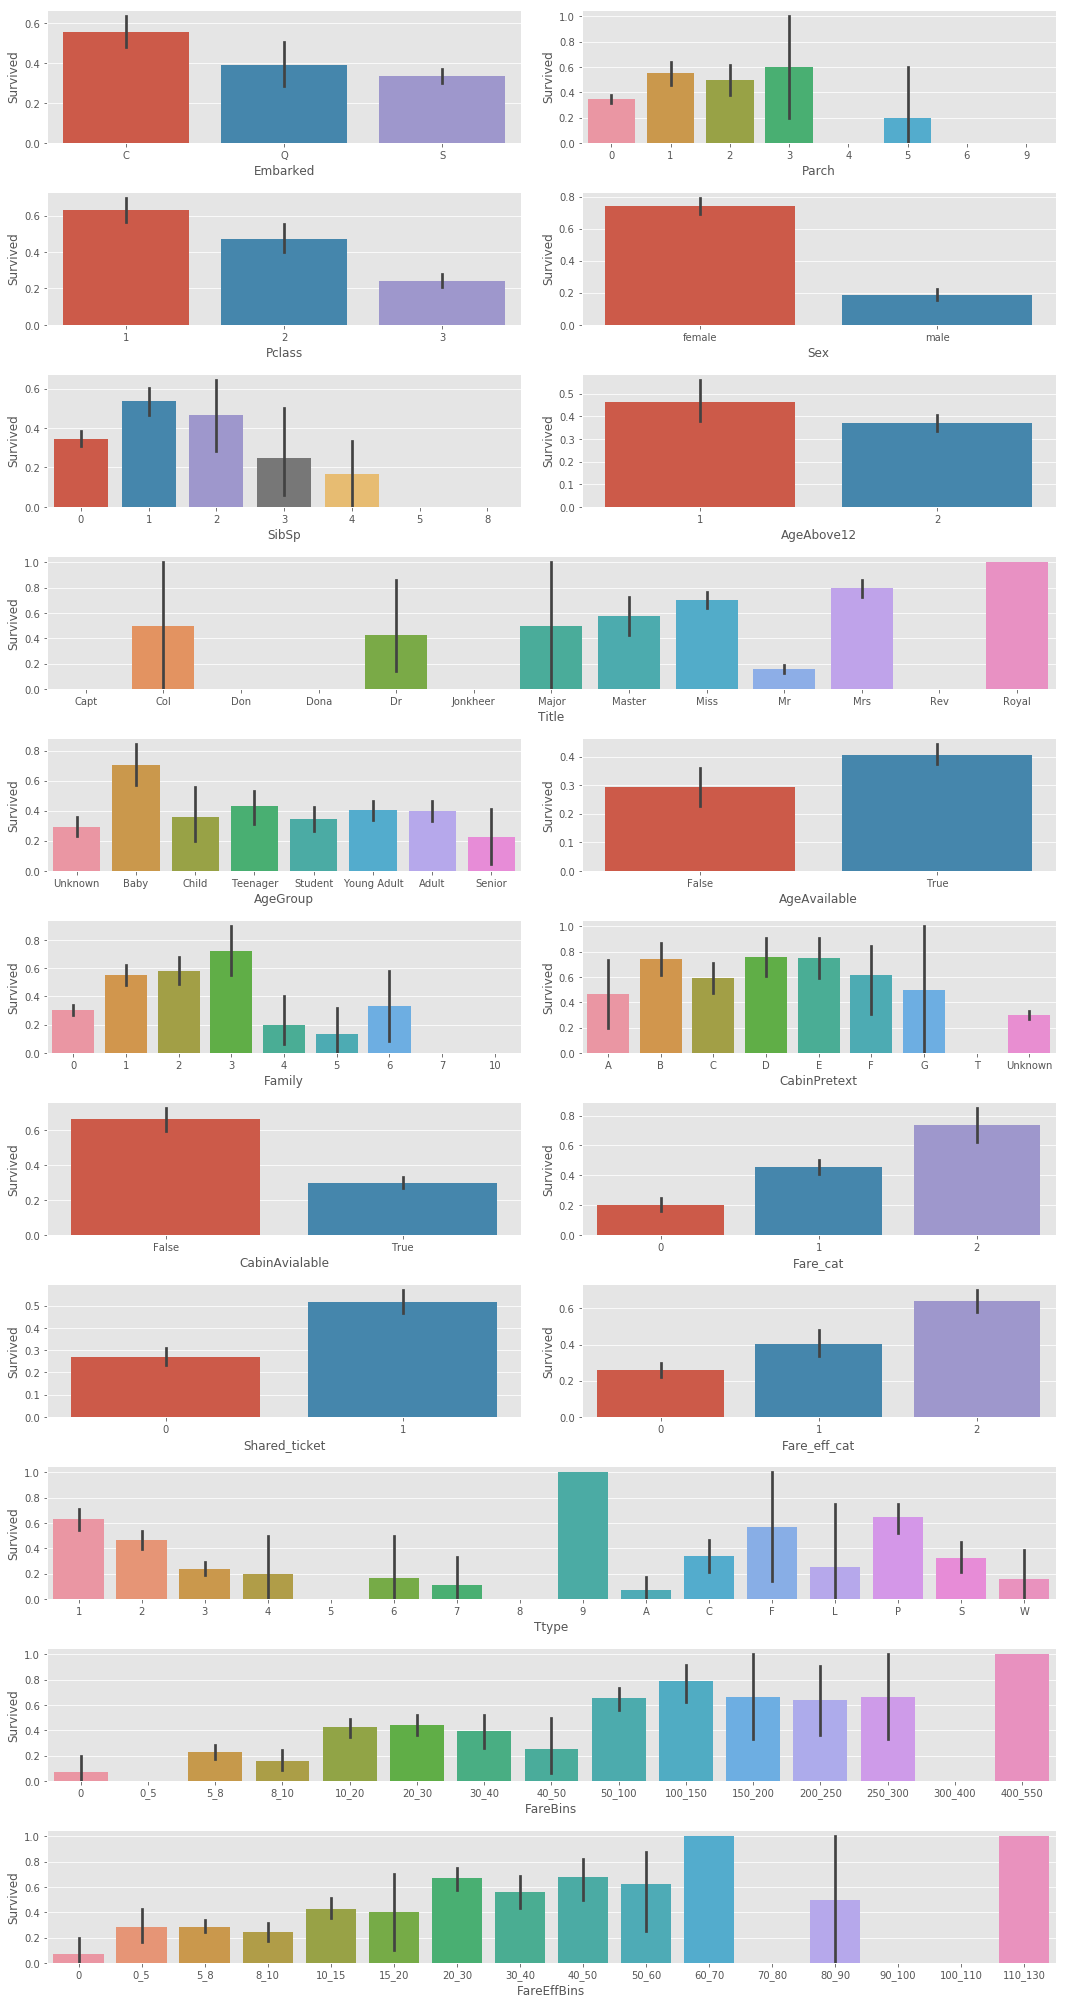

In [62]:
fig = plt.figure(figsize=(15,30))
plt.style.use('ggplot')
sns.despine(left=True)
colno = 2
rowno = (len(cols)+4)//colno
gs = GridSpec(rowno,colno)

i = 0
j = 0
for col in cols:
    if combine[col].value_counts().shape[0] > 10 :
        sns.barplot(x=col, y="Survived", data=combine[combine['DS']=='train'],ax=plt.subplot(gs[i,:])) 
        j=0
        i +=1
    else:
        sns.barplot(x=col, y="Survived", data=combine[combine['DS']=='train'],ax=plt.subplot(gs[i,j])) 
        j+=1
    if j == colno :
        j = 0
        i +=1

            
plt.tight_layout()

In [63]:
# convert categorical values to codes to process the correlation .
for col in cols:
    combine_index[col] = (combine[col].cat.codes)

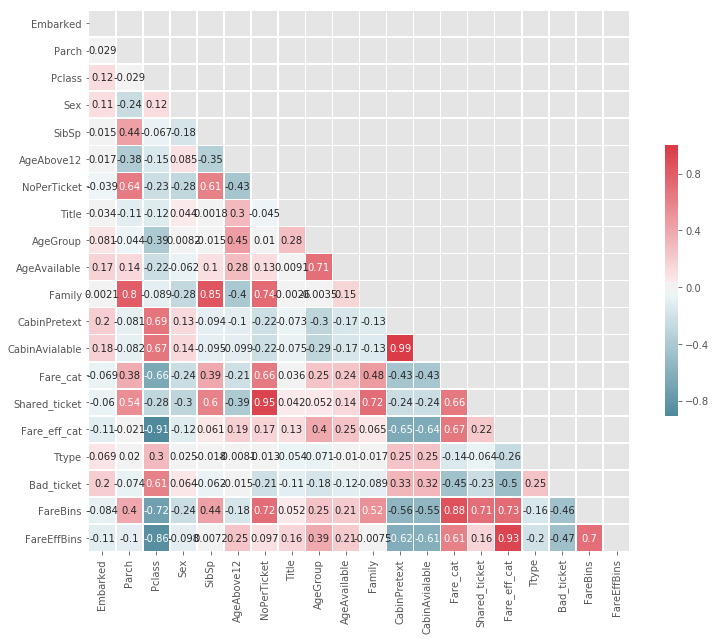

In [65]:
combine_index

# Compute the correlation matrix
corr = combine_index[cols].corr(method='spearman')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.style.use('ggplot')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask,vmax=1,center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.tight_layout()

In [66]:
cor_cols = ['Shared_ticket','Family','Pclass','Fare_eff_cat','CabinAvailable']

In [67]:
cols = combine_index.columns
cols = [x for x in cols if x not in colnotreq]
cols = [x for x in cols if x not in Target]
cols = [x for x in cols if x not in cor_cols]
combine_index.dtypes

Age               float64
Cabin              object
DS                 object
Embarked             int8
Fare              float64
Name               object
Parch                int8
PassengerId         int64
Pclass               int8
Sex                  int8
SibSp                int8
Survived           object
Ticket             object
AgeAbove12           int8
NoPerTicket          int8
Title                int8
AgeGroup             int8
AgeAvailable         int8
Family               int8
CabinPretext         int8
CabinAvialable       int8
Fare_cat             int8
Shared_ticket        int8
Fare_eff          float64
Fare_eff_cat         int8
Ttype                int8
Bad_ticket           int8
FareBins             int8
FareEffBins          int8
dtype: object

In [68]:
#Create train and validation sets from the indexed combine_index dataframe.
from sklearn.model_selection import train_test_split
train= combine_index[combine_index['DS']=='train'].reset_index(drop=True)
train['Survived'] =train['Survived'].astype(np.int)
test = combine_index[combine_index['DS']=='test'].reset_index(drop=True)

x_train, x_val, y_train, y_val = train_test_split(train[cols], train['Survived'], test_size = 0.22, random_state = 0)

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_gaussian)

# Logistic Regression


logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_logreg)

# Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_svc)

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_linear_svc)

# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_perceptron)

#Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_decisiontree)

# Random Forest
randomforest = RandomForestClassifier(n_estimators=1000)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_randomforest)

# KNN or k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_knn)

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_sgd)

# Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_gbk)

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)



,Model,Score
7,Decision Tree,84.77
3,Random Forest,84.26
2,Logistic Regression,83.25
6,Linear SVC,83.25
9,Gradient Boosting Classifier,83.25
5,Perceptron,81.22
4,Naive Bayes,80.20
1,KNN,78.68
0,Support Vector Machines,77.16
8,Stochastic Gradient Descent,43.15


Create Entity Embeddings for Categorical values using Neural Network

In [69]:
#Create embedding sizes.
cat_sz = [(c, len(combine_eEmbed[c].cat.categories)) for c in cols]
emb_szs = [(c, min(10, c)) for _,c in cat_sz]
emb_szs

[(3, 3),
 (8, 8),
 (2, 2),
 (7, 7),
 (2, 2),
 (9, 9),
 (13, 10),
 (8, 8),
 (2, 2),
 (9, 9),
 (2, 2),
 (3, 3),
 (16, 10),
 (2, 2),
 (15, 10),
 (16, 10)]

Create Functions required for creating Model in Pytorch and Dataloader for loading data using Batch process

In [70]:
from torch.nn.init import kaiming_uniform, kaiming_normal

class DlTrain(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __getitem__(self, index):
        X = self.data[index][1:]
        y = self.data[index][0]
        return torch.from_numpy(X), torch.FloatTensor(np.array([y]))
    
    def __len__(self):
        return len(self.data)

def emb_init(x):
    x = x.weight.data
    sc = 2/(x.size(1)+1)
    x.uniform_(-sc,sc)
    

class simplenet(nn.Module):
    def __init__(self,emb_sz,emb_drop,hl_sz,out_sz,drops):
        super().__init__()
        self.embs = nn.ModuleList([nn.Embedding(c,s) for c,s in emb_sz])
        for emb in self.embs: emb_init(emb)
        self.n_emb = sum(e.embedding_dim for e in self.embs)

        hl_sz = [self.n_emb]+hl_sz
        self.lins =nn.ModuleList([nn.Linear(hl_sz[i],hl_sz[i+1]) for i in range(len(hl_sz)-1)])
        self.bns = nn.ModuleList([nn.BatchNorm1d(sz,momentum=0.1) for sz in hl_sz[1:]])
        for o in self.lins: kaiming_normal(o.weight.data)
        
        self.emb_drop = nn.Dropout(emb_drop)
        self.drops = nn.ModuleList([nn.Dropout(drop) for drop in drops])
        
        self.outl = nn.Linear(hl_sz[-1],out_sz)
    def forward(self, x):
        if self.n_emb!=0:
#             print(np.unique((x[:,i].data).numpy()), ": ",i)
            x = [e(x[:,i]) for i,e in enumerate(self.embs)]
            x = torch.cat(x,1)
            x = self.emb_drop(x)
        for l,d,b in zip(self.lins,self.drops,self.bns):
            x = F.relu(l(x))
            x = b(x)
            x = d(x)
        x = self.outl(x)
        return x

In [71]:
data = DlTrain(np.array(pd.concat([y_train,x_train],axis=1)))
data_val = DlTrain(np.array(pd.concat([y_val,x_val],axis=1)))

data_dl = {'train':DataLoader(data, batch_size= 54, shuffle=True, num_workers=0),
          'val':DataLoader(data_val, batch_size=54, shuffle=True, num_workers=0)}
dataset_sizes = {x: len(data_dl[x]) for x in ['train', 'val']}
dataset_sizes = {'train':x_train.shape[0], 'val':x_val.shape[0]}


Initiate model and train

In [82]:


epochs = 500 # set epohcs
criterion = nn.BCEWithLogitsLoss()# define loss function


m = simplenet(emb_szs,0.5,[100,10],1,[0.5,0.5])
# x = m.embs[1].weight.data

### get weight, bias objects
wbs = [(lin.weight) for lin in m.embs]


### keep track of training loss
losses = []

###params
lr = 1e-2

optimizer = optim.Adam(lr = lr, params=m.parameters())

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, epochs, eta_min=0, last_epoch=-1)

best_model_wts = copy.deepcopy(m.state_dict())
best_acc = 0.0

### Training 

for epoch in range(epochs):
    since = time.time()
    print(f'epoch {epoch}')
    # Each epoch has a training and validation phase
    for phase in ['train','val']:
        if phase == 'train':
            scheduler.step()
            m.train(True)  # Set model to training mode
        else:
            m.train(False)  # Set model to evaluate mode
        running_loss = 0.0
        running_corrects = 0
        print(scheduler.get_lr())
#         for data1 in data_dl[phase]:
        for i, batch in enumerate(data_dl[phase]):
            inputs, Survived = batch
            inputs, Survived = Variable(inputs), Variable(Survived,requires_grad=False)
            optimizer.zero_grad()
            outputs = m(inputs) 
            # compute loss and gradients
            loss = criterion(outputs, Survived)
#             losses.append(loss)
            if phase == 'train':
                loss.backward()
                # update weights 
                optimizer.step()

            # statistics
            running_loss += loss.data[0] * inputs.size(0)
            running_corrects += torch.sum(torch.round(F.sigmoid(outputs.data)) == Survived.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects / dataset_sizes[phase]

        print('{} Loss: {:.4f} Acc: {:.4f}'.format(
            phase, epoch_loss, epoch_acc))

        # deep copy the model
        if phase == 'val' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(m.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))


epoch 0
[0.01]
train Loss: 0.6704 Acc: 0.5937

[0.01]
val Loss: 0.5823 Acc: 0.8477

Training complete in 0m 0s
Best val Acc: 0.847716
epoch 1
[0.009999901304280686]
train Loss: 0.5671 Acc: 0.7305

[0.009999901304280686]
val Loss: 0.4607 Acc: 0.8477

Training complete in 0m 0s
Best val Acc: 0.847716
epoch 2
[0.009999605221019081]
train Loss: 0.5256 Acc: 0.7723

[0.009999605221019081]
val Loss: 0.4161 Acc: 0.8122

Training complete in 0m 0s
Best val Acc: 0.847716
epoch 3
[0.009999111761904045]
train Loss: 0.5188 Acc: 0.7781

[0.009999111761904045]
val Loss: 0.3991 Acc: 0.8376

Training complete in 0m 0s
Best val Acc: 0.847716
epoch 4
[0.0099984209464165]
train Loss: 0.4970 Acc: 0.7839

[0.0099984209464165]
val Loss: 0.3754 Acc: 0.8325

Training complete in 0m 0s
Best val Acc: 0.847716
epoch 5
[0.009997532801828659]
train Loss: 0.4963 Acc: 0.7853

[0.009997532801828659]
val Loss: 0.3779 Acc: 0.8426

Training complete in 0m 0s
Best val Acc: 0.847716
epoch 6
[0.009996447363202945]
train Los

train Loss: 0.3993 Acc: 0.8415

[0.009755282581475769]
val Loss: 0.3865 Acc: 0.8426

Training complete in 0m 0s
Best val Acc: 0.847716
epoch 51
[0.009745480724951473]
train Loss: 0.3600 Acc: 0.8545

[0.009745480724951473]
val Loss: 0.3863 Acc: 0.8376

Training complete in 0m 0s
Best val Acc: 0.847716
epoch 52
[0.009735491524973721]
train Loss: 0.3915 Acc: 0.8372

[0.009735491524973721]
val Loss: 0.3785 Acc: 0.8426

Training complete in 0m 0s
Best val Acc: 0.847716
epoch 53
[0.009725315375899024]
train Loss: 0.3767 Acc: 0.8487

[0.009725315375899024]
val Loss: 0.3860 Acc: 0.8376

Training complete in 0m 0s
Best val Acc: 0.847716
epoch 54
[0.009714952679464322]
train Loss: 0.3758 Acc: 0.8444

[0.009714952679464322]
val Loss: 0.3892 Acc: 0.8376

Training complete in 0m 0s
Best val Acc: 0.847716
epoch 55
[0.009704403844771128]
train Loss: 0.3887 Acc: 0.8444

[0.009704403844771128]
val Loss: 0.3893 Acc: 0.8426

Training complete in 0m 0s
Best val Acc: 0.847716
epoch 56
[0.00969366928826937]

train Loss: 0.3740 Acc: 0.8617

[0.009045084971874737]
val Loss: 0.4022 Acc: 0.8426

Training complete in 0m 0s
Best val Acc: 0.852792
epoch 101
[0.00902653942855561]
train Loss: 0.3666 Acc: 0.8617

[0.00902653942855561]
val Loss: 0.4095 Acc: 0.8426

Training complete in 0m 0s
Best val Acc: 0.852792
epoch 102
[0.009007834924354384]
train Loss: 0.3766 Acc: 0.8559

[0.009007834924354384]
val Loss: 0.4105 Acc: 0.8426

Training complete in 0m 0s
Best val Acc: 0.852792
epoch 103
[0.008988972197692855]
train Loss: 0.3872 Acc: 0.8314

[0.008988972197692855]
val Loss: 0.4031 Acc: 0.8325

Training complete in 0m 0s
Best val Acc: 0.852792
epoch 104
[0.008969951993239175]
train Loss: 0.3781 Acc: 0.8444

[0.008969951993239175]
val Loss: 0.3988 Acc: 0.8426

Training complete in 0m 0s
Best val Acc: 0.852792
epoch 105
[0.008950775061878453]
train Loss: 0.3852 Acc: 0.8415

[0.008950775061878453]
val Loss: 0.3951 Acc: 0.8426

Training complete in 0m 0s
Best val Acc: 0.852792
epoch 106
[0.00893144216068

train Loss: 0.3636 Acc: 0.8588

[0.007913452398342881]
val Loss: 0.4018 Acc: 0.8579

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 152
[0.007887863517111338]
train Loss: 0.3782 Acc: 0.8602

[0.007887863517111338]
val Loss: 0.4007 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 153
[0.007862160627972955]
train Loss: 0.3649 Acc: 0.8559

[0.007862160627972955]
val Loss: 0.3959 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 154
[0.007836344745633782]
train Loss: 0.3455 Acc: 0.8573

[0.007836344745633782]
val Loss: 0.3899 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 155
[0.007810416889260653]
train Loss: 0.3688 Acc: 0.8573

[0.007810416889260653]
val Loss: 0.3887 Acc: 0.8629

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 156
[0.00778437808244094]
train Loss: 0.3670 Acc: 0.8429

[0.00778437808244094]
val Loss: 0.3936 Acc: 0.8629

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 157
[0.00775822935314

train Loss: 0.3338 Acc: 0.8660

[0.006515176348163869]
val Loss: 0.4102 Acc: 0.8477

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 202
[0.006485207907885175]
train Loss: 0.3595 Acc: 0.8617

[0.006485207907885175]
val Loss: 0.4017 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 203
[0.00645518083414136]
train Loss: 0.3560 Acc: 0.8444

[0.00645518083414136]
val Loss: 0.3916 Acc: 0.8426

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 204
[0.00642509631234988]
train Loss: 0.3746 Acc: 0.8473

[0.00642509631234988]
val Loss: 0.3850 Acc: 0.8477

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 205
[0.006394955530196147]
train Loss: 0.3509 Acc: 0.8588

[0.006394955530196147]
val Loss: 0.3871 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 206
[0.006364759677586627]
train Loss: 0.3575 Acc: 0.8602

[0.006364759677586627]
val Loss: 0.3815 Acc: 0.8426

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 207
[0.0063345099466018

train Loss: 0.3252 Acc: 0.8732

[0.004968584280172206]
val Loss: 0.4161 Acc: 0.8629

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 252
[0.004937169800583237]
train Loss: 0.3540 Acc: 0.8631

[0.004937169800583237]
val Loss: 0.4075 Acc: 0.8477

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 253
[0.0049057578014229586]
train Loss: 0.3316 Acc: 0.8703

[0.0049057578014229586]
val Loss: 0.4076 Acc: 0.8477

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 254
[0.004874349522783313]
train Loss: 0.3213 Acc: 0.8660

[0.004874349522783313]
val Loss: 0.4088 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 255
[0.004842946204609359]
train Loss: 0.3213 Acc: 0.8660

[0.004842946204609359]
val Loss: 0.4109 Acc: 0.8579

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 256
[0.004811549086650327]
train Loss: 0.3449 Acc: 0.8559

[0.004811549086650327]
val Loss: 0.4151 Acc: 0.8477

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 257
[0.0047801594

train Loss: 0.3091 Acc: 0.8703

[0.003425067401723476]
val Loss: 0.4115 Acc: 0.8477

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 302
[0.0033952819509639534]
train Loss: 0.3430 Acc: 0.8689

[0.0033952819509639534]
val Loss: 0.4101 Acc: 0.8477

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 303
[0.003365559851725288]
train Loss: 0.3347 Acc: 0.8718

[0.003365559851725288]
val Loss: 0.4084 Acc: 0.8477

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 304
[0.003335902277385067]
train Loss: 0.3140 Acc: 0.8746

[0.003335902277385067]
val Loss: 0.4077 Acc: 0.8477

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 305
[0.003306310398773543]
train Loss: 0.3188 Acc: 0.8660

[0.003306310398773543]
val Loss: 0.4074 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 306
[0.0032767853841274147]
train Loss: 0.3438 Acc: 0.8588

[0.0032767853841274147]
val Loss: 0.4095 Acc: 0.8579

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 307
[0.00324732

train Loss: 0.3276 Acc: 0.8631

[0.002035715899194704]
val Loss: 0.4081 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 352
[0.0020104750847124075]
train Loss: 0.3208 Acc: 0.8761

[0.0020104750847124075]
val Loss: 0.4043 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 353
[0.0019853522915548767]
train Loss: 0.3382 Acc: 0.8732

[0.0019853522915548767]
val Loss: 0.4064 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 354
[0.0019603485115269725]
train Loss: 0.3483 Acc: 0.8530

[0.0019603485115269725]
val Loss: 0.4113 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 355
[0.0019354647317351187]
train Loss: 0.3279 Acc: 0.8718

[0.0019354647317351187]
val Loss: 0.4139 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 356
[0.001910701934548328]
train Loss: 0.3173 Acc: 0.8689

[0.001910701934548328]
val Loss: 0.4150 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 357
[0.0018

train Loss: 0.3216 Acc: 0.8761

[0.0009365291778345303]
val Loss: 0.4093 Acc: 0.8579

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 402
[0.0009183037464140797]
train Loss: 0.3269 Acc: 0.8732

[0.0009183037464140797]
val Loss: 0.4070 Acc: 0.8477

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 403
[0.0009002394533727393]
train Loss: 0.3038 Acc: 0.8775

[0.0009002394533727393]
val Loss: 0.4082 Acc: 0.8579

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 404
[0.0008823370118578622]
train Loss: 0.3335 Acc: 0.8761

[0.0008823370118578622]
val Loss: 0.4084 Acc: 0.8579

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 405
[0.0008645971286271914]
train Loss: 0.3001 Acc: 0.8876

[0.0008645971286271914]
val Loss: 0.4073 Acc: 0.8579

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 406
[0.0008470205040209373]
train Loss: 0.3065 Acc: 0.8890

[0.0008470205040209373]
val Loss: 0.4089 Acc: 0.8579

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 407
[0.0

train Loss: 0.3436 Acc: 0.8617

[0.00023510329241390626]
val Loss: 0.4146 Acc: 0.8579

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 452
[0.00022567727626678525]
train Loss: 0.3115 Acc: 0.8732

[0.00022567727626678525]
val Loss: 0.4138 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 453
[0.00021643974220584728]
train Loss: 0.3274 Acc: 0.8631

[0.00021643974220584728]
val Loss: 0.4103 Acc: 0.8579

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 454
[0.00020739105491312084]
train Loss: 0.3078 Acc: 0.8732

[0.00020739105491312084]
val Loss: 0.4103 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 455
[0.00019853157161528467]
train Loss: 0.3240 Acc: 0.8804

[0.00019853157161528467]
val Loss: 0.4130 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch 456
[0.0001898616420695709]
train Loss: 0.2970 Acc: 0.8862

[0.0001898616420695709]
val Loss: 0.4146 Acc: 0.8528

Training complete in 0m 0s
Best val Acc: 0.862944
epoch

Get the Best Model embedding layers weights and use weights for regression analysis

In [83]:
i= 0
ee_list = list()
for col in cols:
    w_col = list(best_model_wts.keys())[i]
    ee_list.append((best_model_wts[w_col].numpy()[combine_index[col],:]))
    i +=1
ee_combine  = np.hstack(ee_list)

Get the first two dimensions of weights using PCA and plot them to see the relation between them.

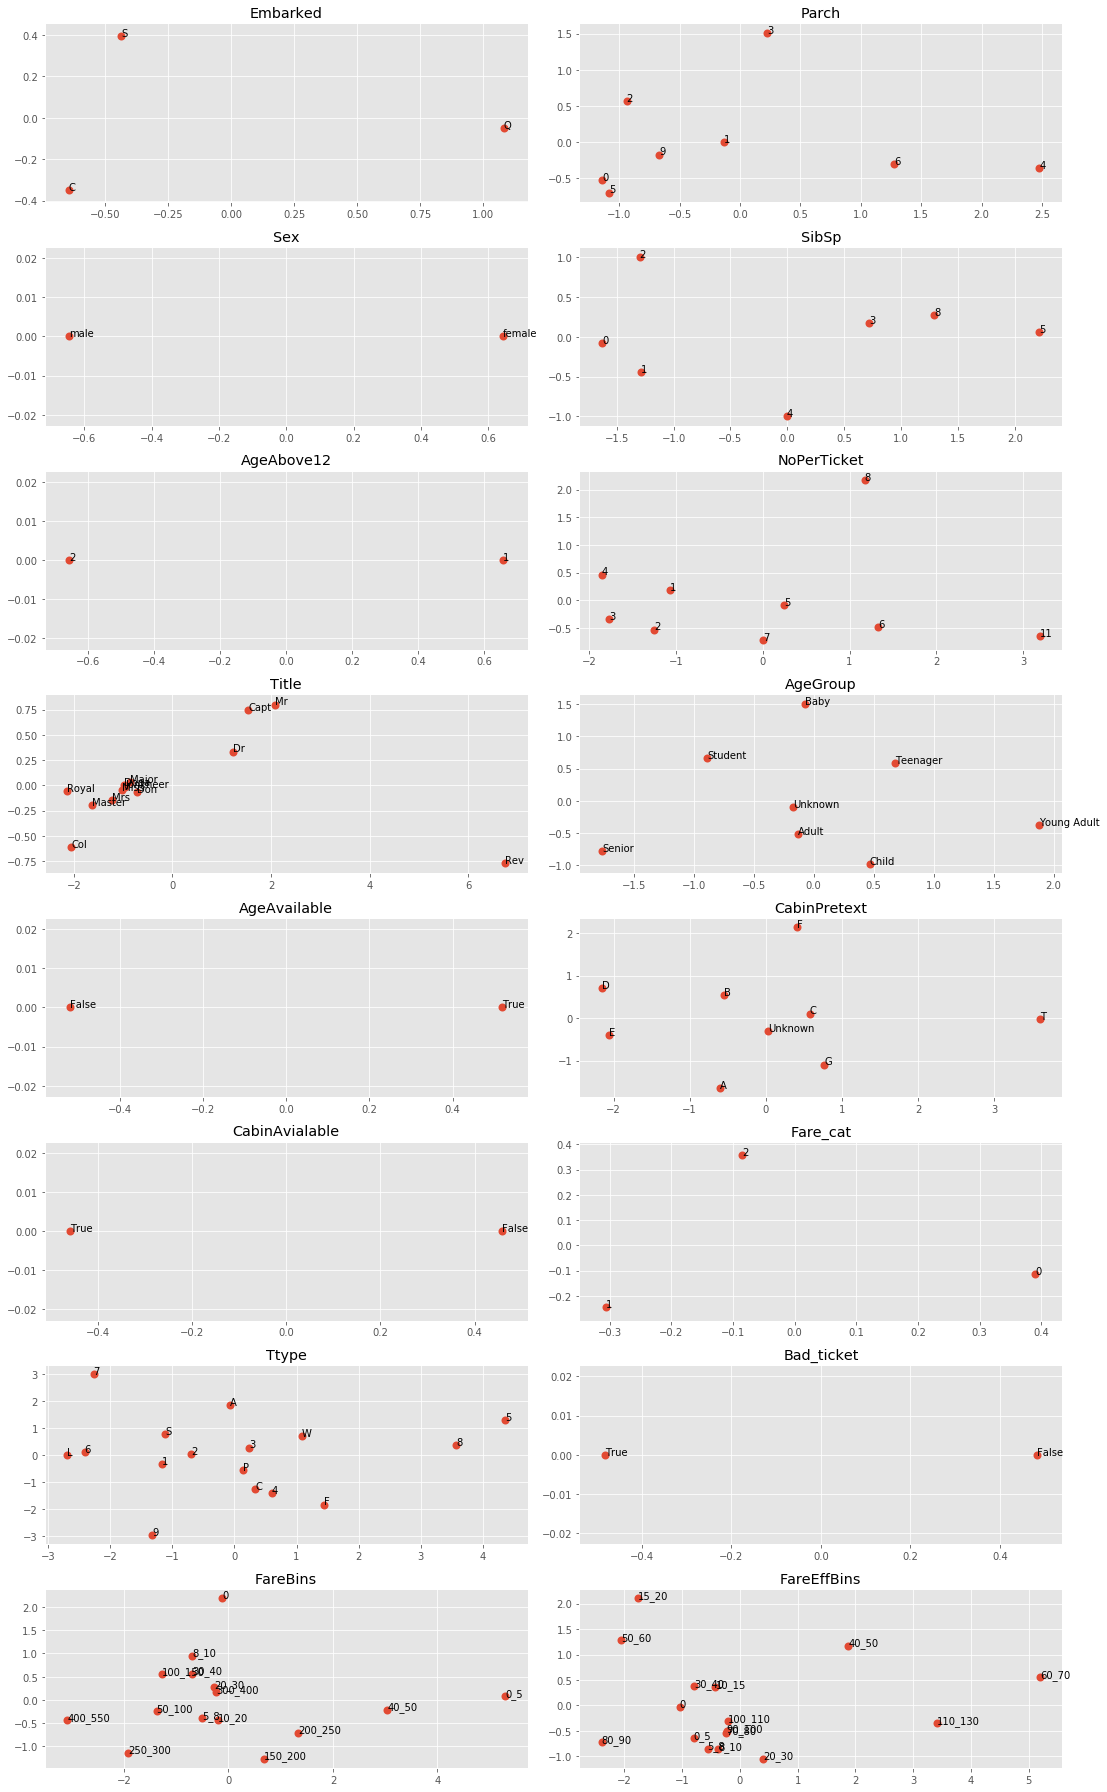

In [84]:
fig = plt.figure(figsize=(15,25))
plt.style.use('ggplot')
sns.despine(left=True)
colno = 2
rowno = (len(cols)+1)//colno
gs = GridSpec(rowno,colno)

for i in range(len(cols)):
    ax = fig.add_subplot(gs[i//2,np.mod(i,2)])
    w = m.embs[i].weight.data
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    result = pca.fit_transform(w)
    ax.scatter(result[:, 0], result[:, 1],linewidths=2)
    ax.set_title(cols[i])
    combine_eEmbed[cols[i]]
    for j, txt in enumerate(combine_eEmbed[cols[i]].cat.categories):
        ax.annotate(txt,(result[j, 0], result[j, 1]))
plt.tight_layout()

In [85]:
#Create train and val sets.
train['Survived'] =train['Survived'].astype(np.int)
target = train['Survived'].astype(np.int)

EEtrain = ee_combine[combine_eEmbed['DS']=='train']
EEtest = ee_combine[combine_eEmbed['DS']=='test']
x_train, x_val, y_train, y_val = train_test_split(EEtrain, target, test_size = 0.22, random_state = 0)


gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
ee_acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_gaussian)

# Logistic Regression


logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
ee_acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_logreg)

# Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
ee_acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_svc)

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
ee_acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_linear_svc)

# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
ee_acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_perceptron)

#Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
ee_acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_decisiontree)

# Random Forest
randomforest = RandomForestClassifier(n_estimators=1000)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
ee_acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_randomforest)

# KNN or k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
ee_acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_knn)

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
ee_acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_sgd)

# Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
ee_acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_gbk)

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk],
    'Entity Embedding Score': [ee_acc_svc, ee_acc_knn, ee_acc_logreg, 
              ee_acc_randomforest, ee_acc_gaussian, ee_acc_perceptron,ee_acc_linear_svc, ee_acc_decisiontree,
              ee_acc_sgd, ee_acc_gbk]},columns = ['Model','Score','Entity Embedding Score'])
models.sort_values(by='Entity Embedding Score', ascending=False)




,Model,Score,Entity Embedding Score
9,Gradient Boosting Classifier,83.25,85.28
3,Random Forest,84.26,84.77
8,Stochastic Gradient Descent,43.15,82.23
2,Logistic Regression,83.25,81.73
0,Support Vector Machines,77.16,81.22
1,KNN,78.68,81.22
6,Linear SVC,83.25,81.22
5,Perceptron,81.22,80.71
4,Naive Bayes,80.20,80.20
7,Decision Tree,84.77,80.20
